In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn import preprocessing

In [3]:
!pip install networkx

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\python39\\share'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
boston_df = pd.read_csv('.\BostonHousing.csv')

In [4]:
# show columns
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [5]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [8]:
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,14.19,19.9,0
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,11.74,18.5,0
51,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,4,243,16.8,9.43,20.5,0
305,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222,18.4,8.93,28.4,0
335,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5,224,20.2,8.01,21.1,0


In [9]:
# rename response
# boston_df.rename(columns={'CAT. MEDV' : 'CAT_MEDV'})
boston_df.columns = [s.strip().replace('. ', '_') for s in boston_df.columns]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [10]:
# read amtrak
amtrak_df = pd.read_csv('./Amtrak.csv', squeeze=True)

In [11]:
amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [12]:
amtrak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [13]:
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%m/%d/%Y')

In [14]:
amtrak_df

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-01-02
2,01/03/1991,1972.715,1991-01-03
3,01/04/1991,1811.665,1991-01-04
4,01/05/1991,1974.964,1991-01-05
...,...,...,...
154,01/11/2003,2076.054,2003-01-11
155,01/12/2003,2140.677,2003-01-12
156,01/01/2004,1831.508,2004-01-01
157,01/02/2004,1838.006,2004-01-02


In [15]:
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-01-02    1620.586
1991-01-03    1972.715
1991-01-04    1811.665
1991-01-05    1974.964
                ...   
2003-01-11    2076.054
2003-01-12    2140.677
2004-01-01    1831.508
2004-01-02    1838.006
2004-01-03    2132.446
Length: 159, dtype: float64

### Pandas built-in functions

Text(0, 0.5, 'Ridership (in 000s)')

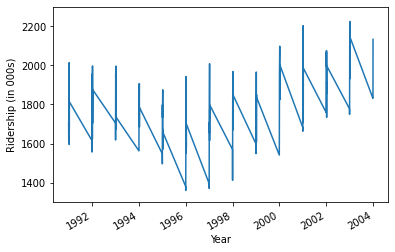

In [16]:
## line graph
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year')
plt.ylabel('Ridership (in 000s)')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

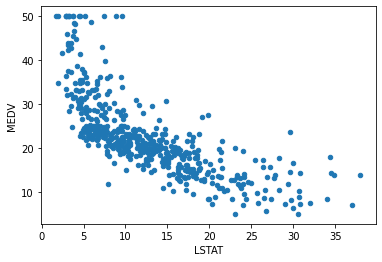

In [17]:
boston_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'AVG MEDV')

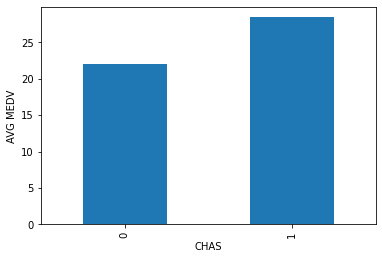

In [18]:
# bar chart between CHAS and mean MEDV
ax = boston_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('AVG MEDV')

Text(0, 0.5, 'Avg CAT_MEDV')

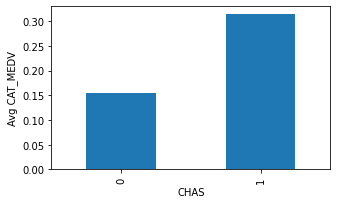

In [19]:
# bar chart of CHAS vs mean CAT_MEDV
dataforplot = boston_df.groupby('CHAS').mean().CAT_MEDV
ax = dataforplot.plot(kind='bar', figsize=(5,3))
ax.set_ylabel('Avg CAT_MEDV')

### Matplotlib version

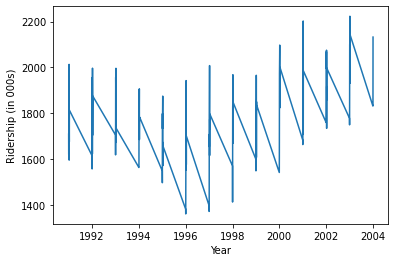

<Figure size 1440x432 with 0 Axes>

In [20]:
#line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')
plt.ylabel('Ridership (in 000s)')
plt.figure(figsize=(20,6))
plt.show()

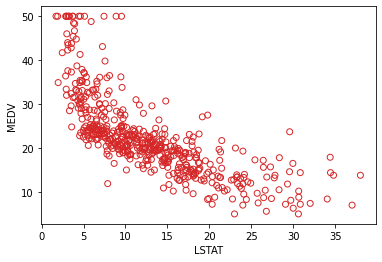

In [21]:
# scatter
plt.scatter(boston_df.LSTAT, boston_df.MEDV, color='C3', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

<ipython-input-22-cf4c727896d7>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg MEDV')

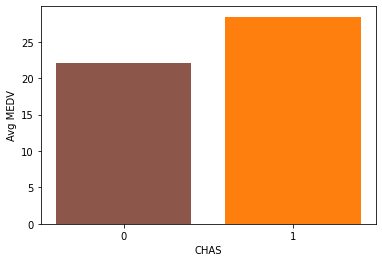

In [22]:
# bar chart of CHAS vs mean MEDV
dataforplot2 = boston_df.groupby('CHAS').mean().MEDV
fix, ax = plt.subplots()
ax.bar(dataforplot2.index, dataforplot2, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg MEDV')


In [23]:
type(dataforplot2)

pandas.core.series.Series

<ipython-input-24-a4a696dc3206>:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0,1], False)


Text(0, 0.5, 'Avg MEDV')

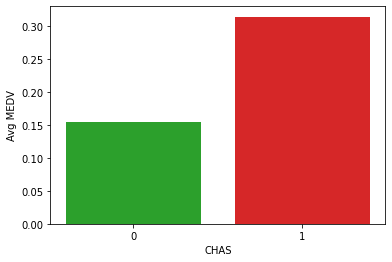

In [24]:
# bar chart of CHAS vs mean CAT_MEDV
dataforplot3 = boston_df.groupby('CHAS').mean().CAT_MEDV
fig, ax = plt.subplots()
ax.bar(dataforplot3.index, dataforplot3, color=['C2', 'C3'])
ax.set_xticks([0,1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg MEDV')

In [25]:
ridership_ts

Date
1991-01-01    1708.917
1991-01-02    1620.586
1991-01-03    1972.715
1991-01-04    1811.665
1991-01-05    1974.964
                ...   
2003-01-11    2076.054
2003-01-12    2140.677
2004-01-01    1831.508
2004-01-02    1838.006
2004-01-03    2132.446
Length: 159, dtype: float64

### Distribution plots: Histograms and Boxplots

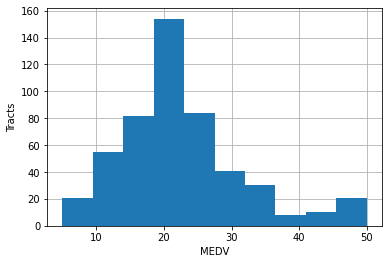

In [26]:
# Histogram of MEDV
ax = boston_df.MEDV.hist()
ax.set_ylabel('Tracts')
ax.set_xlabel('MEDV')
ax.set_axisbelow(True)

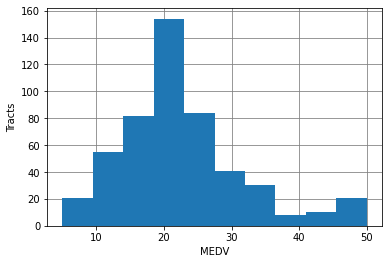

In [27]:
# MAtplotlib version
fig, ax = plt.subplots()
ax.hist(boston_df.MEDV)
ax.set_xlabel('MEDV')
ax.set_ylabel('Tracts')
ax.set_axisbelow(True)
ax.grid(which='major', color='grey', linestyle='-')
plt.show()

Text(0.5, 0.98, '')

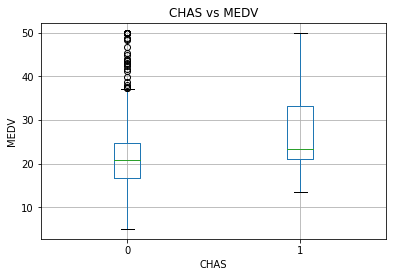

In [28]:
# Boxplot for different values of CHAS vs MEDV
ax = boston_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.title('CHAS vs MEDV')
plt.suptitle('')

In [29]:
boston_df.MEDV[boston_df.CHAS == 1].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

<ipython-input-30-da75199941d0>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([1,2], False)


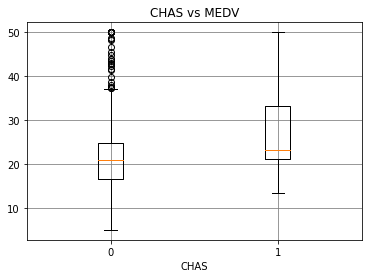

In [30]:
# Matplotlib version
dataforplot = [list(boston_df.MEDV[boston_df.CHAS==0]), list(boston_df.MEDV[boston_df.CHAS==1])]
fig, ax = plt.subplots()
ax.boxplot(dataforplot)
plt.title('CHAS vs MEDV')
plt.xlabel('CHAS')
ax.set_xticks([1,2], False)
ax.set_xticklabels([0,1])
ax.set_axisbelow(True)
ax.grid(which='major', color='grey', linestyle='-')

Text(0.5, 0.98, '')

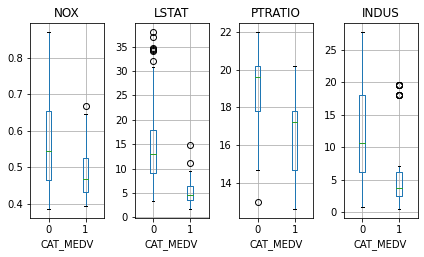

In [31]:
# CAT.MEDV vs NOX, PRATIO, INDUS, LSTAT
fig, axes = plt.subplots(nrows=1, ncols=4)
boston_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
boston_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
boston_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
boston_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
plt.tight_layout()
plt.suptitle('')

### Heatmap for distribution plot


In [32]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


<AxesSubplot:>

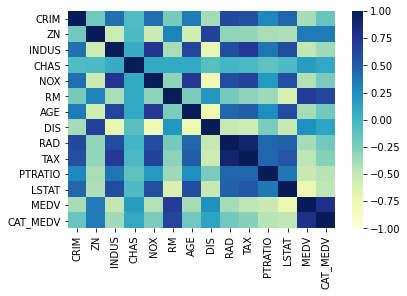

In [44]:
corr = boston_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='YlGnBu')

<AxesSubplot:>

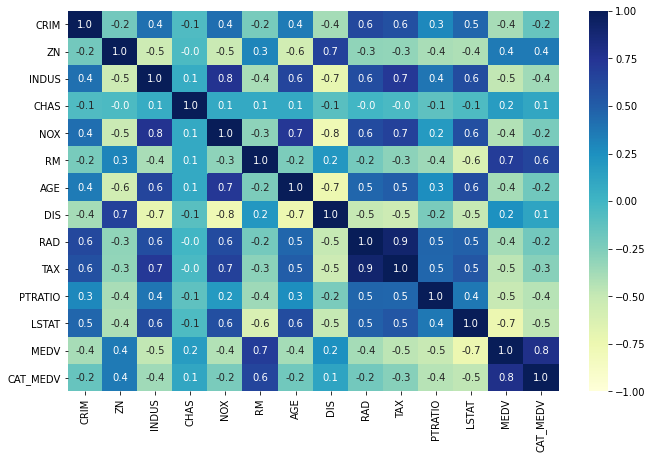

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='YlGnBu', center=0, ax=ax, annot=True, fmt='.1f')

### Heatmap for missing values

In [53]:
motor_df = pd.read_csv('./NYPD_Motor_Vehicle_Collisions_1000.csv')

In [56]:
motor_df.head()


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/15/2016,0:30,MANHATTAN,10003.0,40.735270,-73.982346,"(40.73527, -73.982346)",NaN,NaN,300 EAST 19 STREET,...,Unspecified,NaN,NaN,NaN,3406829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,06/25/2013,13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2879485,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
2,09/15/2012,23:10,QUEENS,11418.0,40.695822,-73.821102,"(40.6958225, -73.8211022)",ATLANTIC AVENUE,127 STREET,NaN,...,Unspecified,NaN,NaN,NaN,204319,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/14/2018,10:00,NaN,NaN,40.699017,-73.806960,"(40.699017, -73.80696)",SUTPHIN BOULEVARD,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3862996,PASSENGER VEHICLE,BU,NaN,NaN,NaN
4,06/06/2018,19:45,BRONX,10454.0,40.807770,-73.910230,"(40.80777, -73.91023)",CONCORD AVENUE,EAST 142 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3915520,Carry All,Sedan,NaN,NaN,NaN


In [57]:
naInfo = np.zeros(motor_df.shape)
naInfo[motor_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=motor_df.columns)
naInfo

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


array([[False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'DATE'),
  Text(1.5, 0, 'TIME'),
  Text(2.5, 0, 'BOROUGH'),
  Text(3.5, 0, 'ZIP CODE'),
  Text(4.5, 0, 'LATITUDE'),
  Text(5.5, 0, 'LONGITUDE'),
  Text(6.5, 0, 'LOCATION'),
  Text(7.5, 0, 'ON STREET NAME'),
  Text(8.5, 0, 'CROSS STREET NAME'),
  Text(9.5, 0, 'OFF STREET NAME'),
  Text(10.5, 0, 'NUMBER OF PERSONS INJURED'),
  Text(11.5, 0, 'NUMBER OF PERSONS KILLED'),
  Text(12.5, 0, 'NUMBER OF PEDESTRIANS INJURED'),
  Text(13.5, 0, 'NUMBER OF PEDESTRIANS KILLED'),
  Text(14.5, 0, 'NUMBER OF CYCLIST INJURED'),
  Text(15.5, 0, 'NUMBER OF CYCLIST KILLED'),
  Text(16.5, 0, 'NUMBER OF MOTORIST INJURED'),
  Text(17.5, 0, 'NUMBER OF MOTORIST KILLED'),
  Text(18.5, 0, 'CONTRIBUTING FACTOR VEHICLE 1'),
  Text(19.5, 0, 'CONTRIBUTING FACTOR VEHICLE 2'),
  Text(20.5, 0, 'CONTRIBUTING FA

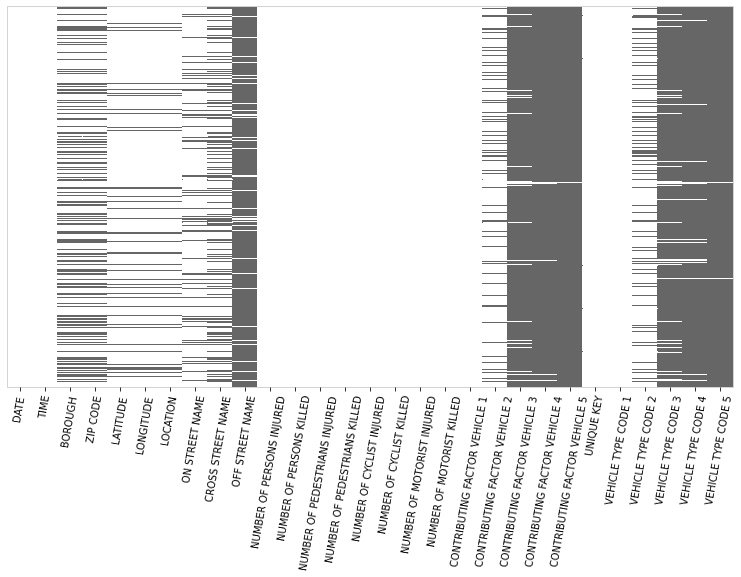

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(13,7)
sns.heatmap(naInfo, vmin=0, vmax=1, cmap=['White', '#666666'], cbar=False, ax=ax)
ax.set_yticks([])
rect=plt.Rectangle((0,0), naInfo.shape[1], naInfo.shape[0], linewidth=1, edgecolor='lightgrey', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

### Multidimensional Visualization

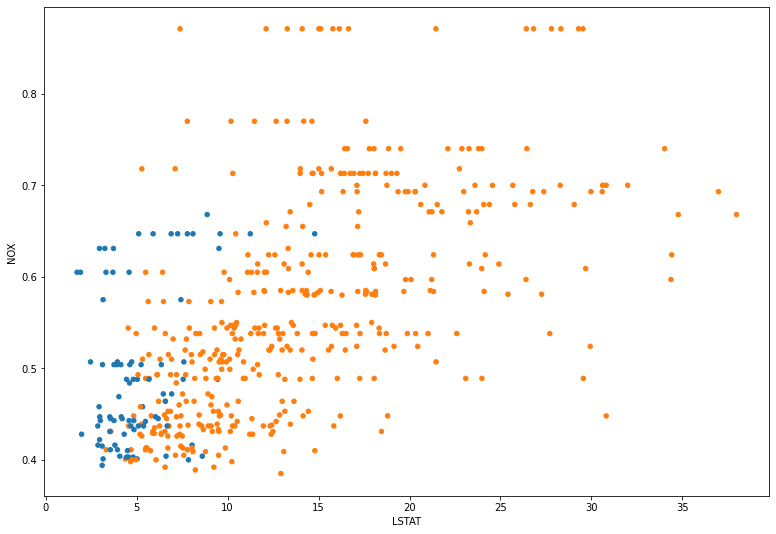

In [86]:

boston_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if ct==1 else 'C1' for ct in boston_df.CAT_MEDV])
plt.gcf().set_size_inches(13,9)

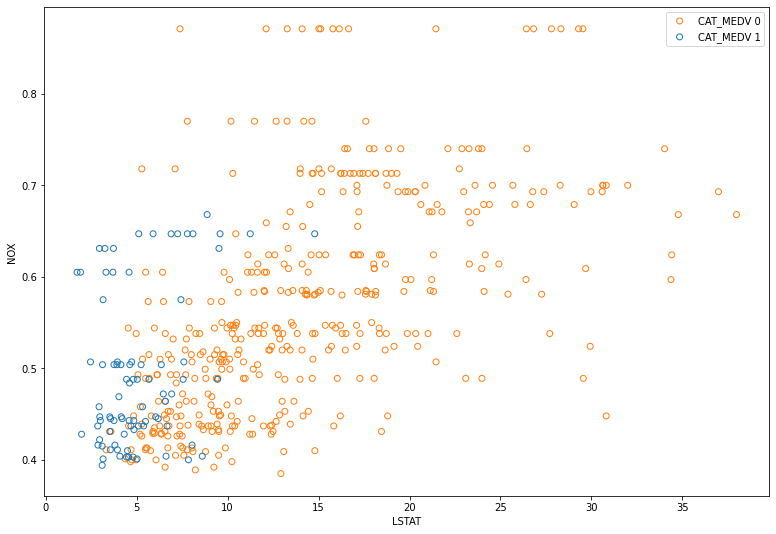

In [79]:
fig, ax = plt.subplots()
for catvalue, color in (0, 'C1'), (1, 'C0'):
    subset_df = boston_df[boston_df.CAT_MEDV == catvalue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(['CAT_MEDV 0', 'CAT_MEDV 1'])
fig.set_size_inches(13,9)
plt.show()

In [69]:
# bar chart of Mean MEDV vs CHAS, RAD
dataforplot_df = boston_df.groupby(['CHAS', 'RAD']).mean()['MEDV']
dataforplot_df

CHAS  RAD
0     1      23.015789
      2      26.833333
      3      27.927778
      4      21.040196
      5      25.521154
      6      20.976923
      7      27.105882
      8      31.505263
      24     15.438710
1     1      50.000000
      3      27.950000
      4      25.812500
      5      27.463636
      8      26.000000
      24     31.362500
Name: MEDV, dtype: float64

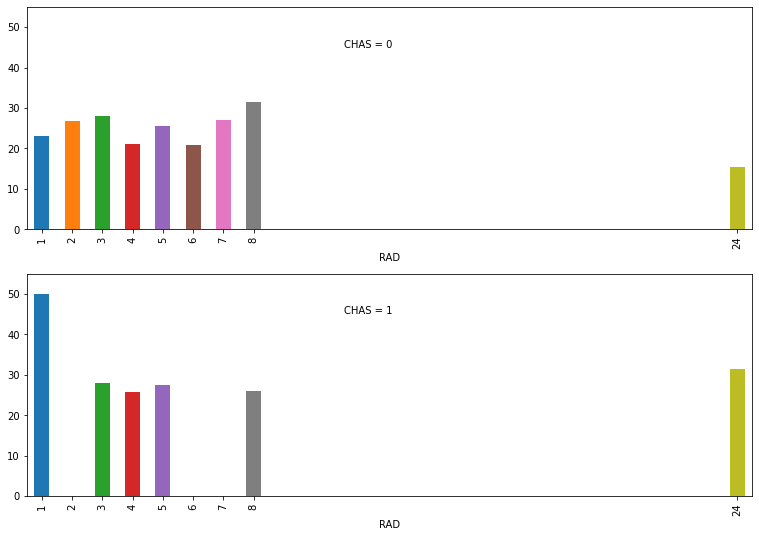

In [91]:
ticks = set(boston_df.RAD)
# make sure every values in the ticks set
for i in range(2):
    for t in ticks.difference(dataforplot_df[i].index):
        dataforplot_df.loc[i, t] = 0
        
dataforplot_df = dataforplot_df[sorted(dataforplot_df.index)]
yRange = [0, max(dataforplot_df) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
dataforplot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
dataforplot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
axes[0].annotate('CHAS = 0', xy=(11, 45))
axes[1].annotate('CHAS = 1', xy=(11, 45))
fig.set_size_inches(13, 9)
plt.show()
